In [2]:
import statistics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

Read House Data (from Kaggle )

In [3]:
data = pd.read_csv('housing.csv', usecols = ['price','sqft_living','sqft_lot','bedrooms','floors','condition','yr_built'])
data

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,3.130000e+05,3.0,1340,7912,1.5,3,1955
1,2.384000e+06,5.0,3650,9050,2.0,5,1921
2,3.420000e+05,3.0,1930,11947,1.0,4,1966
3,4.200000e+05,3.0,2000,8030,1.0,4,1963
4,5.500000e+05,4.0,1940,10500,1.0,4,1976
...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1510,6360,1.0,4,1954
4596,5.343333e+05,3.0,1460,7573,2.0,3,1983
4597,4.169042e+05,3.0,3010,7014,2.0,3,2009
4598,2.034000e+05,4.0,2090,6630,1.0,3,1974


Correlation using seaborn heatmap


Note that the correlations are below 0.8 for price vs all variables.
Note to self: end the prediction here. No valuable insight from data

The correlation of house price vs sqft_living is same as the one that I did manually using simple linear regression. I can say that methods below correspond with the standard linear regression methods that I knew from statistics class

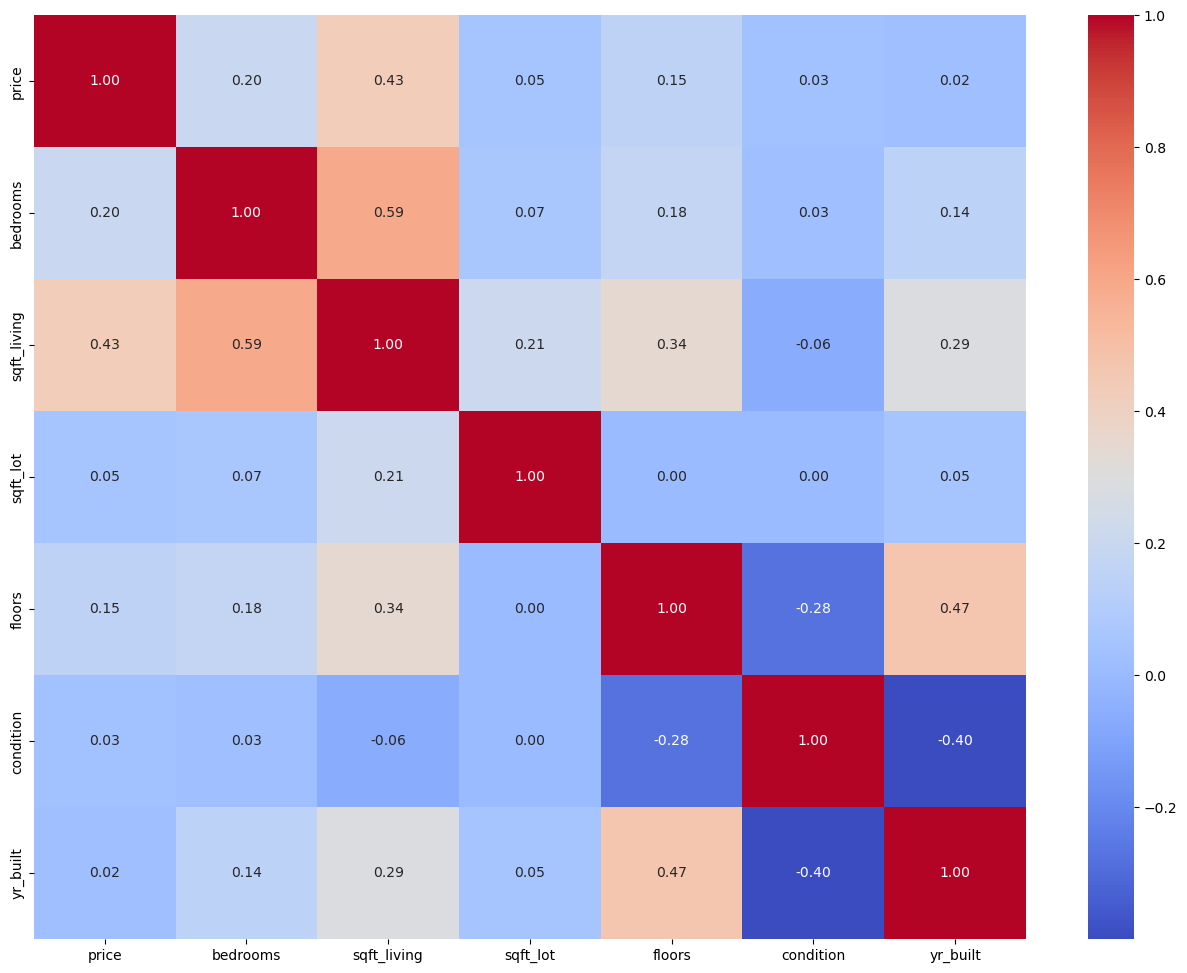

In [4]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
correlation = np.corrcoef(data['price'],data['sqft_living'])
print(correlation[0,1])
print(correlation)

0.43041002543262824
[[1.         0.43041003]
 [0.43041003 1.        ]]


In [6]:
data.loc[data["price"]>1000000]

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
1,2.384000e+06,5.0,3650,9050,2.0,5,1921
11,1.400000e+06,4.0,2920,4000,1.5,5,1909
14,1.200000e+06,5.0,2910,9480,1.5,3,1939
99,1.395000e+06,5.0,4010,8510,2.0,5,1971
107,1.090000e+06,4.0,4340,141570,2.5,3,1992
...,...,...,...,...,...,...,...
4375,1.020000e+06,3.0,2950,78843,1.5,3,2006
4465,2.560498e+06,3.0,1710,1664,2.0,5,2003
4467,1.337044e+06,4.0,4280,9583,2.0,3,2005
4494,1.036200e+06,4.0,2500,5801,1.5,3,1926


In [7]:
r , p = stats.pearsonr(data['price'] ,data['sqft_living'])
print(r , p)

0.43041002543262796 7.549895925396118e-207


In [8]:
stats.linregress(data['sqft_living'] ,data['price'])

LinregressResult(slope=251.95013105923712, intercept=12954.2423963818, rvalue=0.43041002543262813, pvalue=7.54989592537419e-207, stderr=7.792183430562373, intercept_stderr=18281.55053482217)

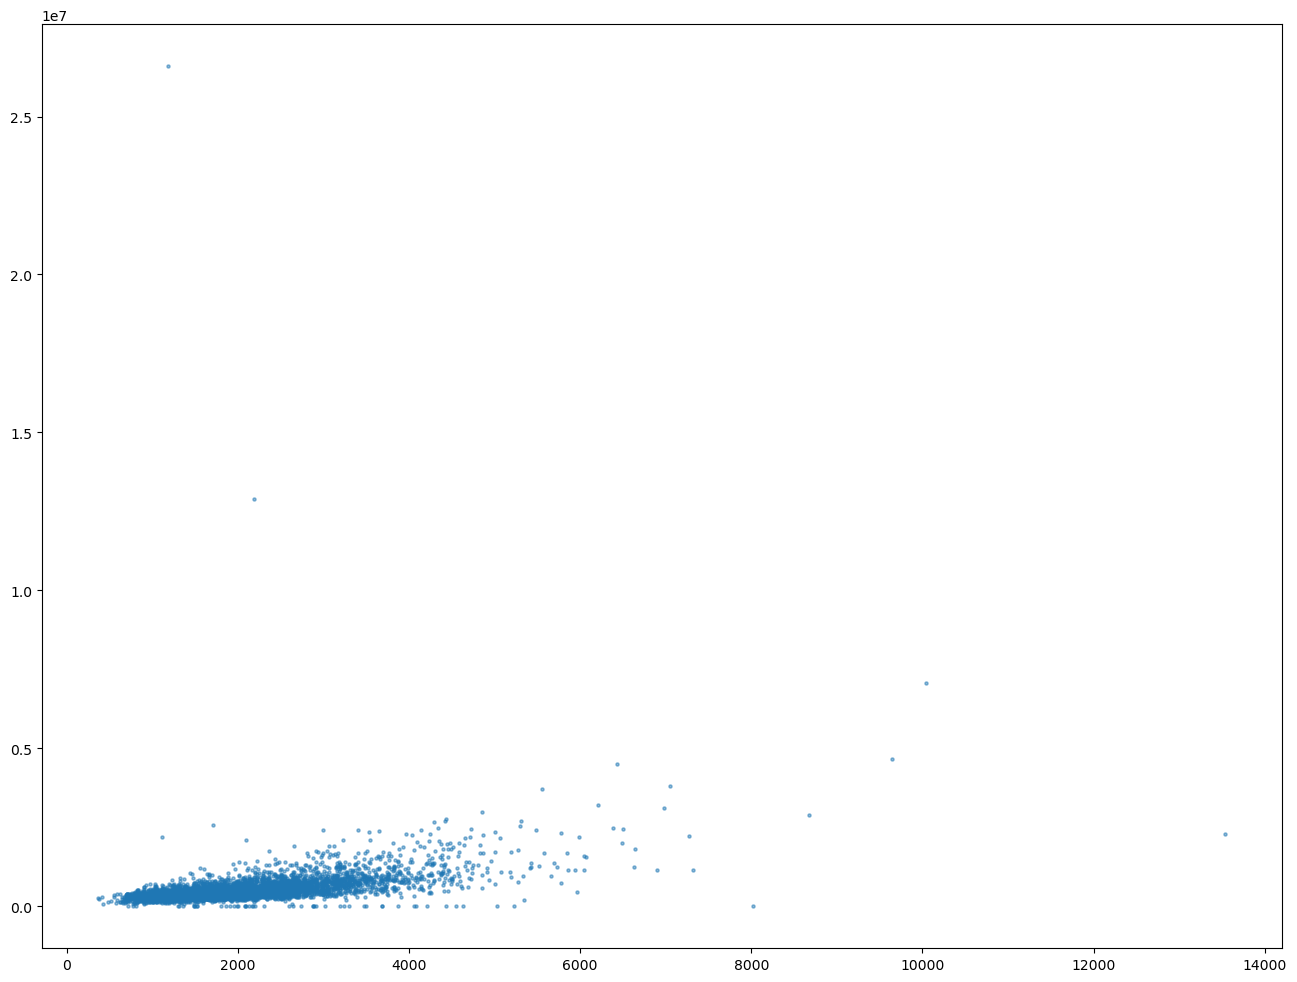

In [9]:
plt.figure(figsize=(16,12))
plt.scatter(data['sqft_living'],data['price'],s = 5 , alpha = 0.5)

Let's try remove outlier

In [10]:
y = data['price']

In [11]:
mean = np.mean(y)
mean

551962.9884732141

In [12]:
std_dev = np.std(y, ddof = 1)
std_dev
#std.dev is as large as mean --> this is because the outliers are affecting our data

563834.7025471417

In [13]:
upper_limit = mean + (2 * std_dev)
lower_limit = mean - (2 * std_dev)
print(lower_limit,upper_limit)

-575706.4166210693 1679632.3935674974


{'whiskers': [<matplotlib.lines.Line2D at 0x1f567acd3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f567acd930>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f567acd150>],
 'medians': [<matplotlib.lines.Line2D at 0x1f567acde70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f567ace110>],
 'means': []}

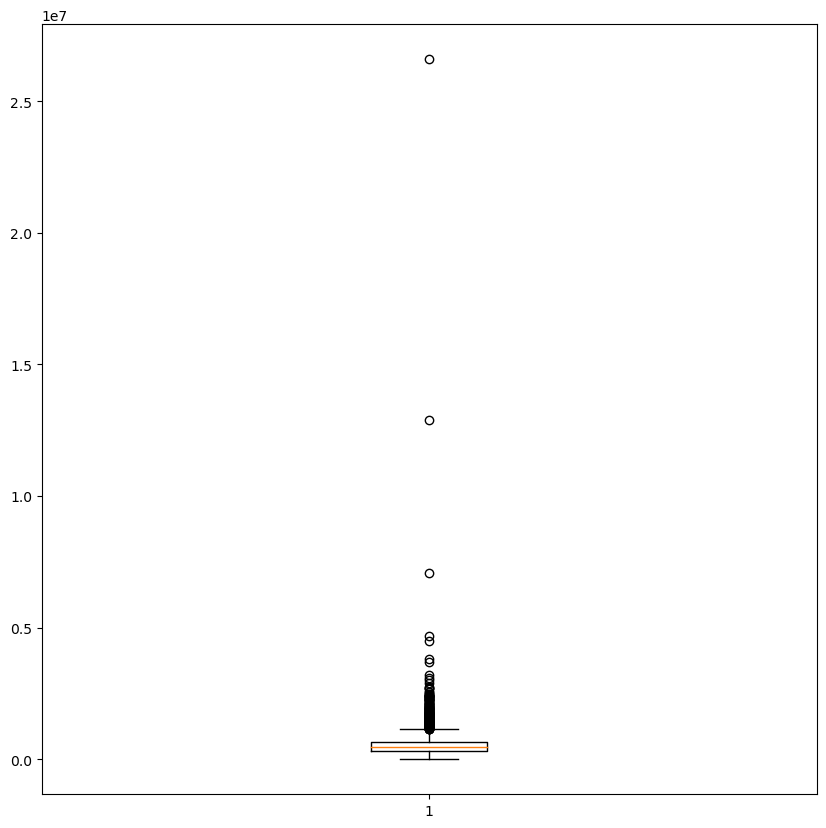

In [14]:
plt.figure(figsize = (10,10))
plt.boxplot(y) 

In [15]:
stats.skew(y) 
# the data skew too much to right. Lets remove this outlier

24.78284782965085

In [16]:
#use quartile to remove outlier
y_quantile = np.quantile(y,[0.25,0.5,0.75])
inter_quantile = y_quantile[2] - y_quantile[0]
inter_quantile
upper_fence = y_quantile[2] + inter_quantile * 1.5 
lower_fence = y_quantile[0] - inter_quantile * 1.5
print(y_quantile , inter_quantile )
print(lower_fence, upper_fence)

[322875.        460943.4615385 654962.5      ] 332087.5
-175256.25 1153093.75


In [17]:
data.loc[data["price"] > upper_fence]

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
1,2.384000e+06,5.0,3650,9050,2.0,5,1921
11,1.400000e+06,4.0,2920,4000,1.5,5,1909
14,1.200000e+06,5.0,2910,9480,1.5,3,1939
99,1.395000e+06,5.0,4010,8510,2.0,5,1971
122,2.280000e+06,7.0,13540,307752,3.0,3,1999
...,...,...,...,...,...,...,...
4348,2.199900e+06,4.0,1120,5427,1.0,3,1969
4350,2.659000e+07,3.0,1180,7793,1.0,4,1992
4465,2.560498e+06,3.0,1710,1664,2.0,5,2003
4467,1.337044e+06,4.0,4280,9583,2.0,3,2005


In [18]:
data.loc[data["price"] < lower_fence]
# beacuse negative value

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built


In [19]:

data_filtered = data[(data.price < upper_fence) & (data.price > 0)]
data_filtered

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,313000.000000,3.0,1340,7912,1.5,3,1955
2,342000.000000,3.0,1930,11947,1.0,4,1966
3,420000.000000,3.0,2000,8030,1.0,4,1963
4,550000.000000,4.0,1940,10500,1.0,4,1976
5,490000.000000,2.0,880,6380,1.0,3,1938
...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1510,6360,1.0,4,1954
4596,534333.333333,3.0,1460,7573,2.0,3,1983
4597,416904.166667,3.0,3010,7014,2.0,3,2009
4598,203400.000000,4.0,2090,6630,1.0,3,1974


In [20]:
x_new = data_filtered['sqft_living']
y_new = data_filtered['price']
y_new

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4311, dtype: float64

In [21]:
stats.skew(y_new)
# now the skewness is better

0.7274796527237108

{'whiskers': [<matplotlib.lines.Line2D at 0x1f567b55120>,
 'caps': [<matplotlib.lines.Line2D at 0x1f567b55510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f567b54e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1f567b55a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f567b55d20>],
 'means': []}

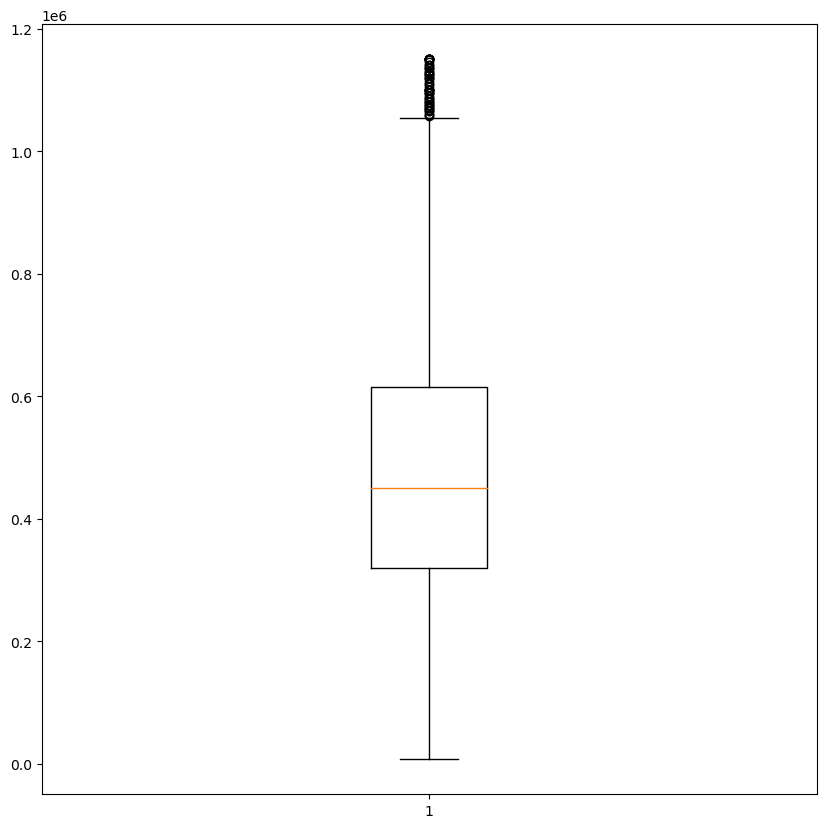

In [22]:
plt.figure(figsize = (10,10))
plt.boxplot(y_new)

In [23]:
new_mean = np.mean(y_new)
print(new_mean)
new_median = np.median(y_new)
print(new_median)
new_std_dev = np.std(y_new, ddof = 1)
print(new_std_dev)
upper_limit = new_mean + (2 * new_std_dev)
lower_limit = new_mean - (2 * new_std_dev)
print(f'We can say in 95% confidence level, the data is between {lower_limit} and {upper_limit}') 

487456.9019044595
450000.0
215659.64102237727
We can say in 95% confidence level, the data is between 56137.61985970498 and 918776.183949214


Text(0.5, 0, 'Prices on house')

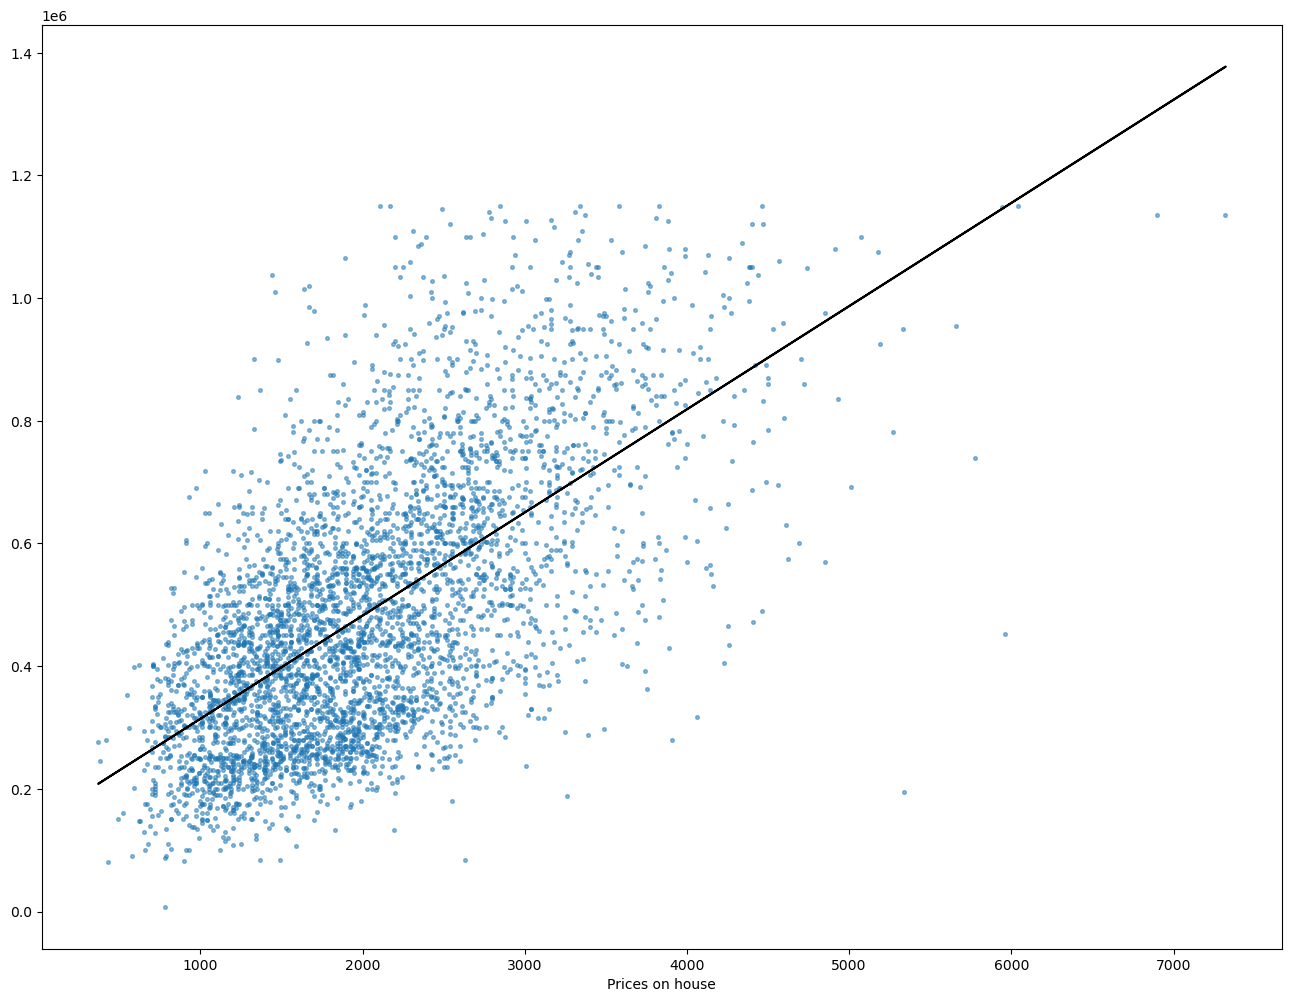

In [28]:
plt.figure(figsize=(16,12))
plt.scatter(x_new,y_new, s = 7, alpha = 0.5)
plt.plot(x_new, y_new_pred, color = 'black')
plt.xlabel('Prices on house')

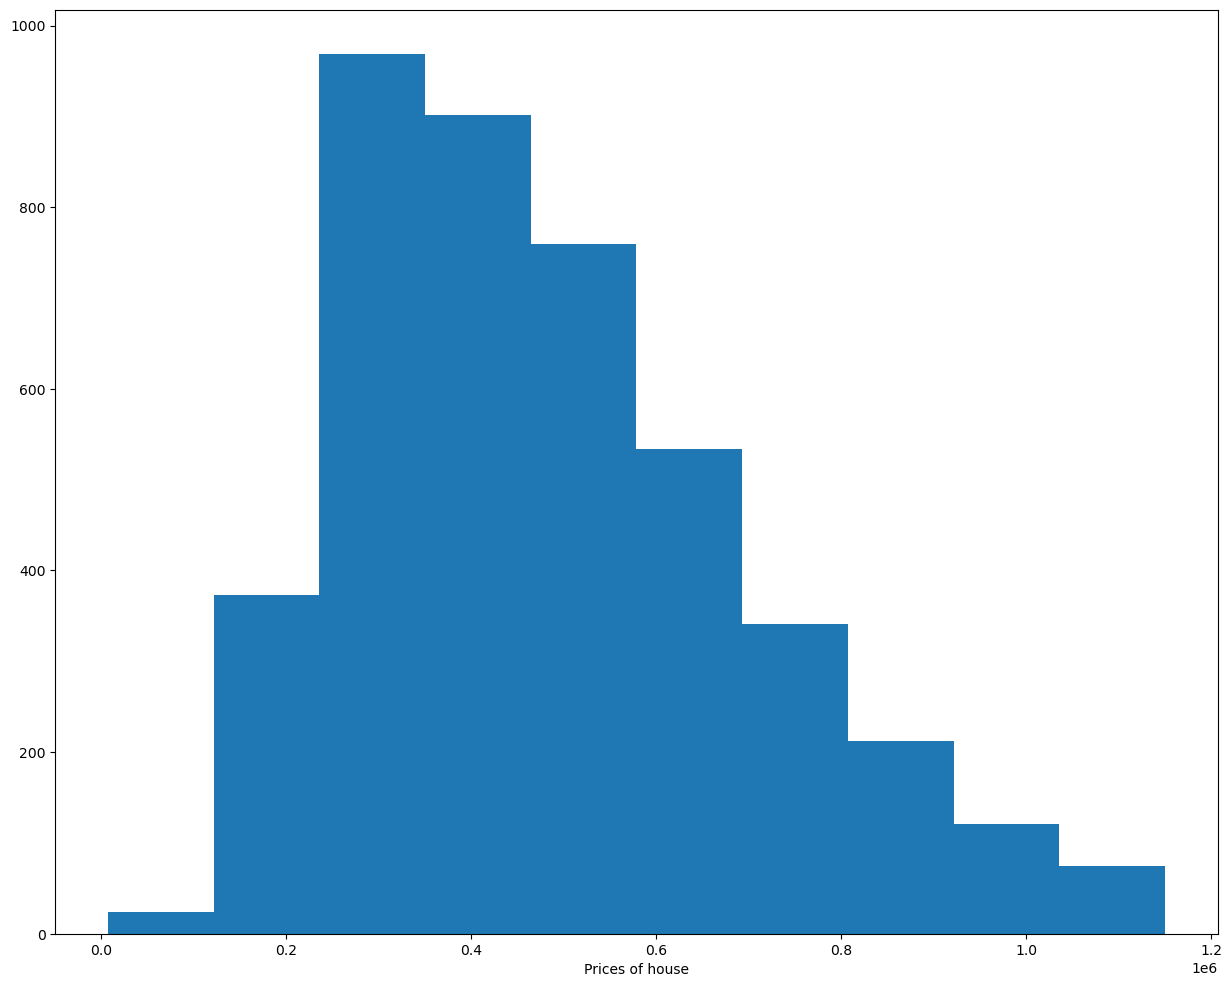

In [25]:
plt.figure(figsize = (15,12))
plt.hist(y_new)
plt.xlabel('Prices of house')
plt.show()

In [26]:
lin = stats.linregress(x_new,y_new)
lin

LinregressResult(slope=168.17868185910584, intercept=145936.79205343593, rvalue=0.6317732191041697, pvalue=0.0, stderr=3.1434681996265335, intercept_stderr=6872.56335242379)

In [29]:
y_new_pred = []
for i in x_new:
    y_pred = i * lin.slope + lin.intercept
    y_new_pred.append(y_pred)


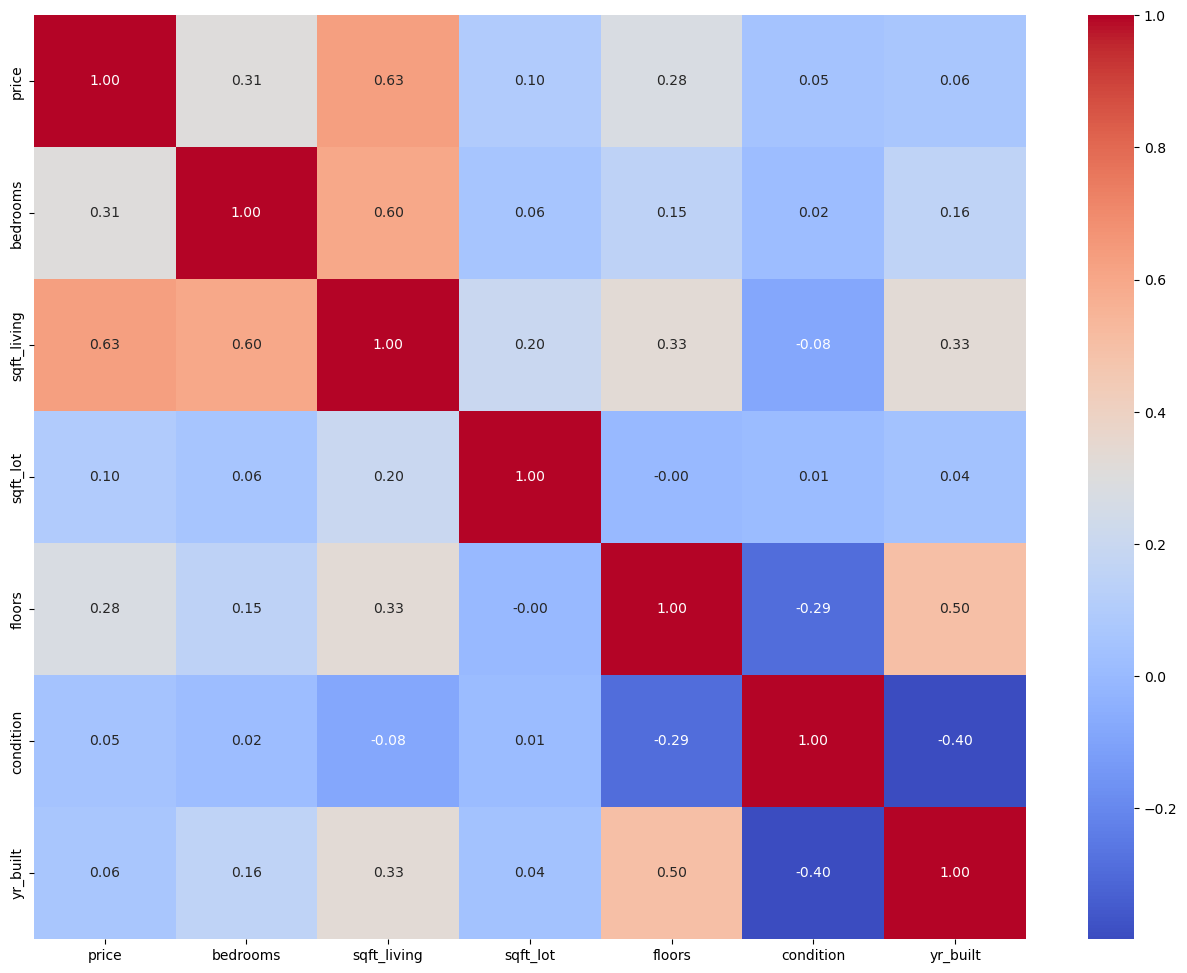

In [30]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data_filtered.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [31]:
data_filtered.loc[ data_filtered.price < 10000]

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
4351,7800.0,2.0,780,16344,1.0,1,1942


In [32]:
data_filtered.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
price,1.000000,0.309080,0.631773,0.098622,0.276608,0.047677,0.062516
bedrooms,0.309080,1.000000,0.597027,0.060086,0.151722,0.015454,0.155562
sqft_living,0.631773,0.597027,1.000000,0.202208,0.333174,-0.083133,0.332638
sqft_lot,0.098622,0.060086,0.202208,1.000000,-0.002050,0.006598,0.040410
floors,0.276608,0.151722,0.333174,-0.002050,1.000000,-0.292974,0.498902
condition,0.047677,0.015454,-0.083133,0.006598,-0.292974,1.000000,-0.397942
yr_built,0.062516,0.155562,0.332638,0.040410,0.498902,-0.397942,1.000000
